In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tidy3d as td
from Devices import L3Simulation
from tidy3d_utilities import Utilities

utilities = Utilities()

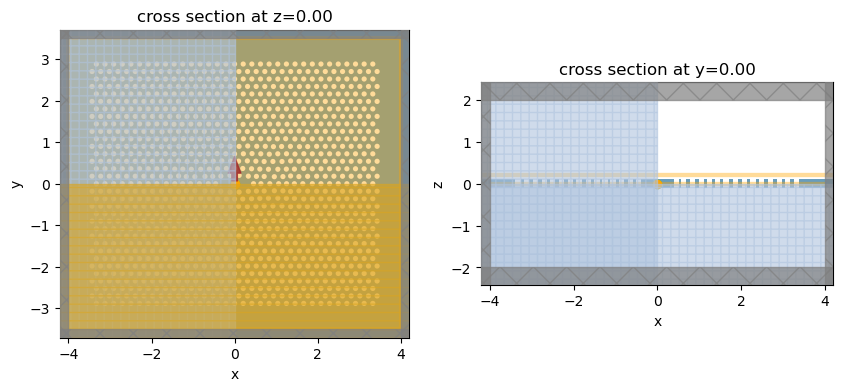

'\nLoad data from file/taskid\n'

In [2]:
weights_name = 'L3_520nm_weights_step_size_100_gmax_2_kpoints_2_Q_target_10e5_phc_size_16_field'
file_name = rf'.\weights_520_15.08.2025\param_history\{weights_name}_param_history.npy'
# file_name = None

L3_design_options = {'param_file_name': file_name}

L3 = L3Simulation(wavelength_in_at="520", design_args=L3_design_options)

simulation_options = {
    'run_time': 7,
    'sim_size': [8, 7, 4],
    'mesh_grid_size': 15,
    'plot': True,
    'field_monitor': True,
    'field_monitor_size': [8, 7, 0],
    'far_field_monitor': True,
    'symmetry': [1, -1, 1]
}

simulation = L3.make_simulation(simulation_options)
# sim_data = L3.run_simulation(simulation)
# sim_data.to_file(fname=f'.\Tidy3D_data\{weights_name}_phcsize_{L3.Nx_final}.hdf5')
'''
Load data from file/taskid
'''

# sim_data = td.web.load('fdve-aa554693-a849-44aa-9ddf-0e16d0f4e07c')
# sim_data = td.SimulationData.from_file(
#     rf"D:\Neelesh\inverse design\Tidy3D_data\{weights_name}_phcsize_{32}.hdf5")


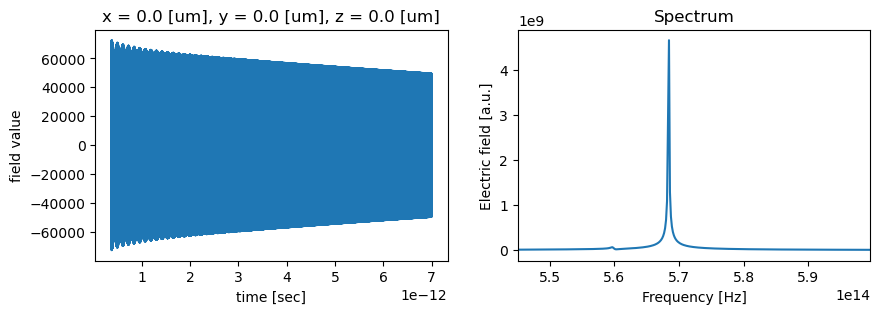

                     decay            Q     amplitude     phase     error
freq                                                                     
5.683028e+14  4.568138e+10  39083.22693  33536.772758  0.909558  0.006422
Cavity Resonance at 527.52 nm; Q = 39083.0


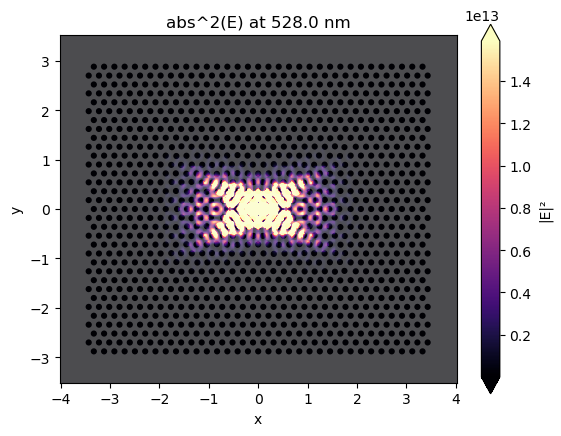

In [ ]:
L3.analyze_FieldTimeMonitor(sim_data,
                            freq_range=L3.freq_range,
                            plot_bool=True,
                            print_data_bool=True)

L3.analyze_FieldMonitor(sim_data, freq_range=L3.freq_range, val="abs^2")

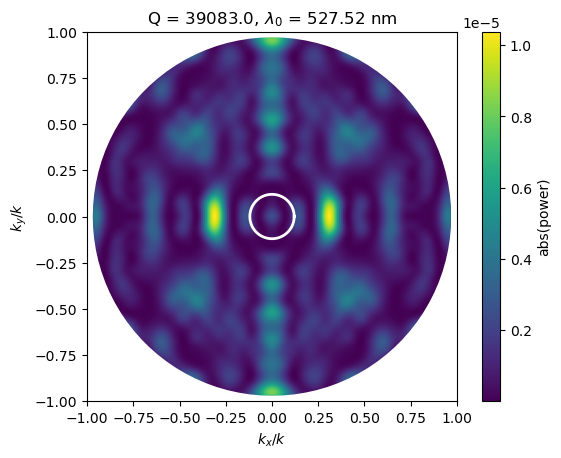

In [10]:
(fig, ax, far_field) = L3.analyze_FarFieldMonitor(sim_data,
                                                  plot_field="power",
                                                  val="abs")

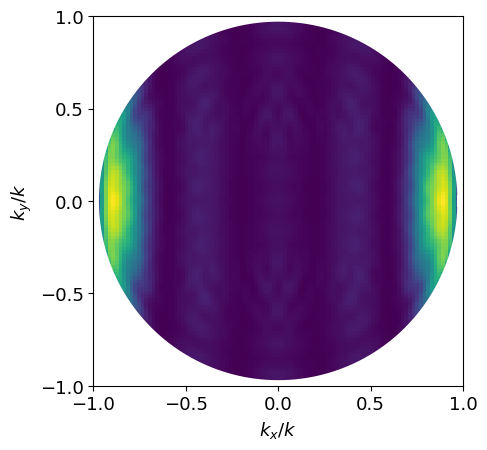

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
ux = np.array(far_field.ux)
uy = np.array(far_field.uy)
ux, uy = np.meshgrid(ux, uy)

im = ax.imshow(far_field / np.max(far_field),
               extent=[ux.min(), ux.max(), uy.min(),
                       uy.max()])
ax.set_xlabel("$k_x/k$", fontsize=13)
ax.set_ylabel("$k_y/k$", fontsize=13)
plt.xticks([-1, -0.5, 0, 0.5, 1], fontsize=13)
plt.yticks([-1, -0.5, 0, 0.5, 1], fontsize=13)
phis = np.linspace(0, np.pi * 2, 201)
ax.plot(np.cos(phis), np.sin(phis), lw=8, color="w")
# plt.grid(color="grey")
plt.savefig("./Tidy3D_data/bullseye_farfield.png", dpi=600)
plt.show()

In [24]:
overlap = utilities.calculate_directionality(far_field,
                                             ff_type="gaussian",
                                             NA=0.55,
                                             bool_plot=True)

TypeError: FDTD_utilities.calculate_directionality() got an unexpected keyword argument 'ff_type'

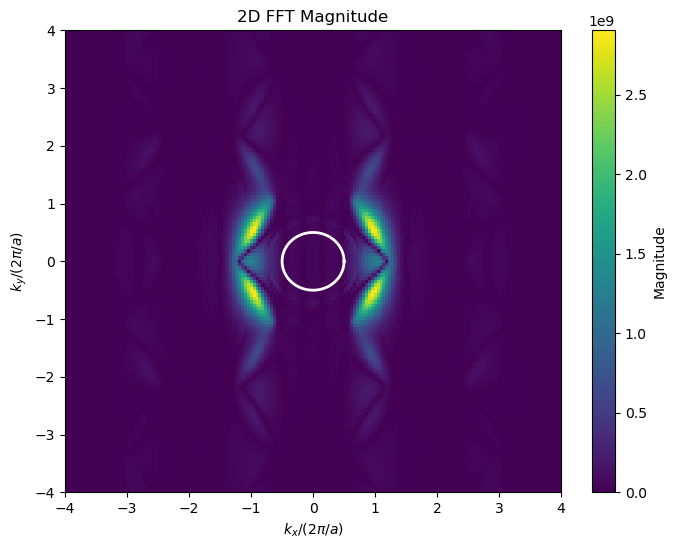

In [12]:
magnitude, (kx, ky) = L3.fourier_transform_2D(sim_data)

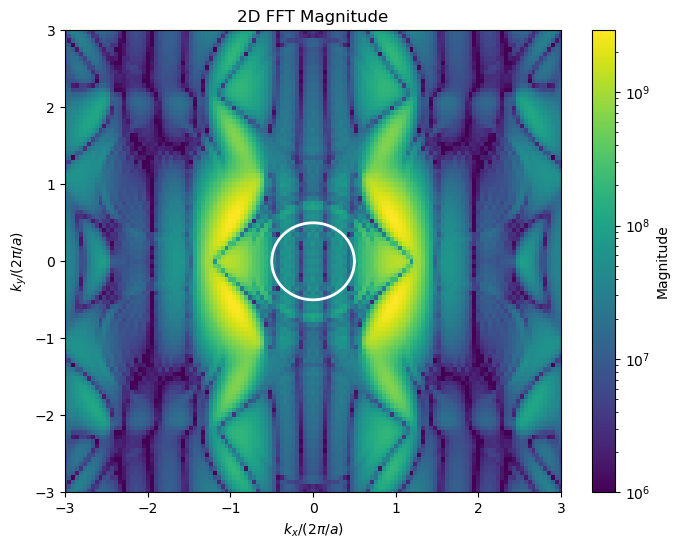

In [ ]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(kx,
               ky,
               magnitude,
               shading='auto',
               cmap='viridis',
               norm='log',
               vmin=1e6)

# Plot light circle
phis = np.linspace(0, np.pi * 2, 201)
radius = (1 / 2)
plt.plot(radius * np.cos(phis), radius * np.sin(phis), lw=2, color="w")

plt.colorbar(label='Magnitude')
plt.xlabel('$k_x/ (2 \pi /a)$')
plt.ylabel('$k_y/ (2 \pi /a)$')
plt.title('2D FFT Magnitude')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
# plt.grid(True)
plt.show()

In [16]:
kx_mesh, ky_mesh = np.meshgrid(kx, ky)
integral_norm = np.trapz(np.trapz(np.nan_to_num(magnitude)))
sine_theta = kx_mesh**2 + ky_mesh**2
E_circle = np.where(sine_theta < 0.5, magnitude / integral_norm, 0)
eta = np.trapz(np.trapz((E_circle)))
print(eta)
# plt.contourf(kx_mesh, ky_mesh, magnitude)

0.012621135405710858


(0.0, 2.0)

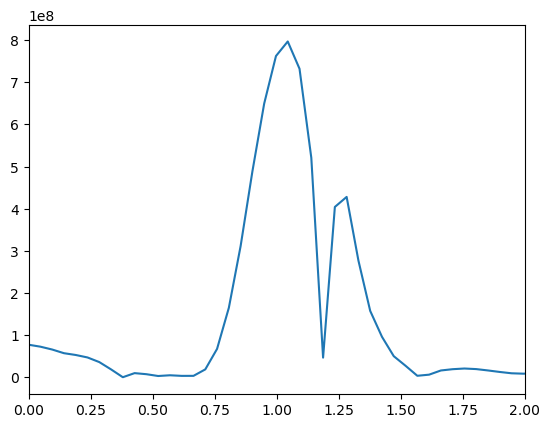

In [ ]:
plt.plot(kx[magnitude.shape[1] // 2:], magnitude[magnitude.shape[0] // 2,
                                                 magnitude.shape[1] // 2:])
plt.xlim(0, 2)